<h1 style="text-align:center">Undamped Response to Harmonic Seismic Inputs<br>Transfer Function Form</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpring_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring System </strong>
</p>

This notebook examines the frequency response of a simple mass-spring system like the one shown in Figure 1. It has a position input, $ y(t) $, that is known to be harmonic connected to the mass, $ m $, via a spring of stiffness $ k $. The position of the mass is defined by $ x(t) $.

The equation of motion for the system is:

<!-- the \quad commmand just adds a space in the math mode -->
$ \quad m \ddot{x} + kx = ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + \omega_n^2x = \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

In [3]:
# Import the plotting functions 
import matplotlib.pyplot as plt

In [4]:
# Define the System Parameters
m = 1.0                 # kg
k = (2.0 * np.pi)**2.      # N/m (Selected to give an undamped natural frequency of 1Hz)
wn = np.sqrt(k / m)       # Natural Frequency (rad/s)

Let's use the closed-form, steady-state solution we developed in lecture:

Assume:

$ \quad y(t) = \bar{y} \sin{\omega t} $

Then, the solution $x(t)$ should have the form:

$ \quad x(t) = a \sin{\omega t} + b \cos{\omega t} $

We saw that when we substituted this assumed solution into the equations of motion for this undamped system, the $b$ constant was elimiinated, leaving:

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2}\bar{y} \sin{\omega t} $

or 

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2} y(t) $

So, $ \frac{\omega_n^2}{\omega_n^2 - \omega^2} $ gives us the relationship between the input $ y(t) $ and the system response $ x(t) $. <br><br>

### Transfer Function Form
We can then write the transfer function (which represents the "tranformation" of the input to the output) as:

$ \quad \frac{\mbox{Output}}{\mbox{Input}} \equiv \frac{x(t)}{y(t)} = \frac{\omega_n^2}{\omega_n^2 - \omega^2} $

So our transfer funciton is then:

$ \quad G(\omega) = \frac{\omega_n^2}{\omega_n^2 - \omega^2} $

We can also normalize this according to $ \Omega = \frac{\omega}{\omega_n} $:

$ \quad G(\Omega) = \frac{1}{1 - \Omega^2} $

In [5]:
# Set up input parameters
wnorm = np.linspace(0.01,3,1000)            # Frequency range for freq response plot, 0-3x wn with 1000 points in-between

TFnorm_amp = (1) / (1 - wnorm**2)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(TFnorm_amp) >= 50)
TFnorm_amp[pos] = np.nan
wnorm[pos] = np.nan

# Now define the magnitude and phase of this TF
TFnorm_mag = np.sqrt(TFnorm_amp**2)
TFnorm_phase = -np.arctan2(0,TFnorm_amp)

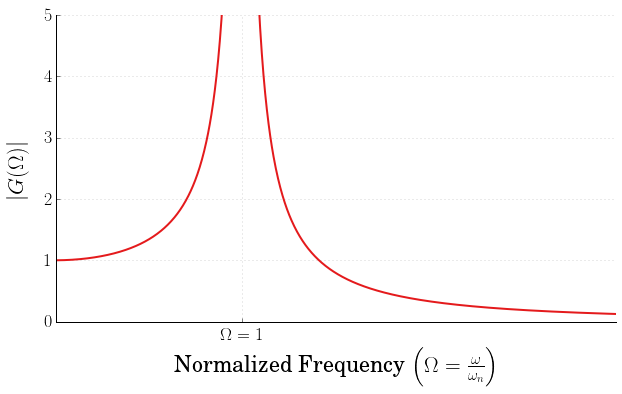

In [6]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.23,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$ |G(\Omega)| $',family='serif',fontsize=22,weight='bold',labelpad=15)
plt.ylim(0.0,5.0)
# yticks([0,1])
plt.xticks([0,1],['0','$\Omega = 1$'])

plt.plot(wnorm,TFnorm_mag,linewidth=2)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicTF_NormAmp.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

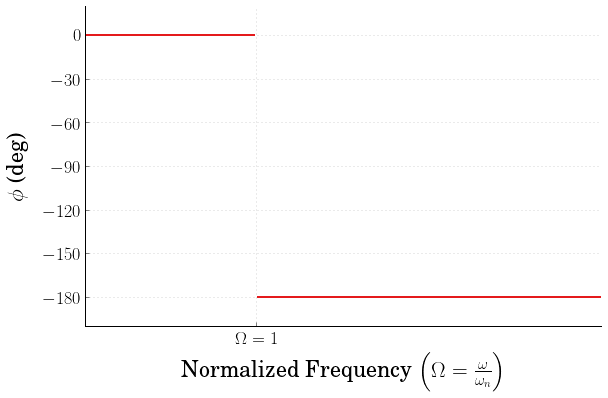

In [7]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.23,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=15)
plt.ylim(-200.0,20.0,)
plt.yticks([0,-30, -60, -90, -120, -150,-180])
plt.xticks([0,1],['0','$\Omega = 1$'])

plt.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicTF_Phase.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

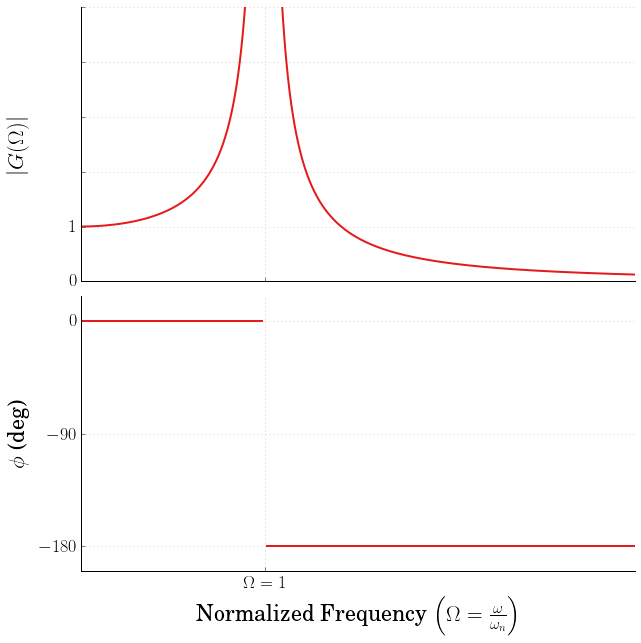

In [23]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.xticks([0,1],['0','$\Omega = 1$'])

# Magnitude plot
ax1.set_ylabel(r'$ |G(\Omega)| $',family='serif',fontsize=22,weight='bold',labelpad=40)
ax1.plot(wnorm,TFnorm_mag,linewidth=2)
ax1.set_ylim(0.0,5.0)
ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels(['$0$', '$1$', '', '', '', ''])

# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
ax2.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([0, -90, -180])

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicTF.pdf',dpi=300)

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.


In [9]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())